In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [2]:
df = pd.read_csv("duolingo_reviews_cleanwemoji.csv")
df.head()


,content,clean_content
0,"bug: new updates in-lesson streak UI, green Bo...",bug new updates inlesson streak ui green bolt ...
1,this thing ressetted my 90765 day streek.I hat...,thing ressetted day streeki hate stuipid duoli...
2,What's happened with the animation after valid...,whats happened animation validation last updat...
3,please don't immediately stop the speaking les...,please dont immediately stop speaking lessons ...
4,I love this app,love app


In [3]:
sia = SentimentIntensityAnalyzer()


In [4]:
def get_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [5]:
df['sentiment'] = df['content'].apply(get_sentiment)#apply sentiment analysis to the content column 

In [6]:
df['vader_scores'] = df['content'].apply(lambda x: sia.polarity_scores(str(x)))


In [7]:
print(df[['content', 'sentiment', 'vader_scores']].head())

                                             content sentiment  \
0  bug: new updates in-lesson streak UI, green Bo...  positive   
1  this thing ressetted my 90765 day streek.I hat...  negative   
2  What's happened with the animation after valid...   neutral   
3  please don't immediately stop the speaking les...   neutral   
4                                    I love this app  positive   

                                        vader_scores  
0  {'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compou...  
1  {'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.091, 'neu': 0.785, 'pos': 0.124, 'co...  
4  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...  


In [ ]:
print("\nSentiment values:")
print(df['sentiment'].value_counts())


Sentiment Counts:
sentiment
positive    1133
negative     121
neutral      119
Name: count, dtype: int64


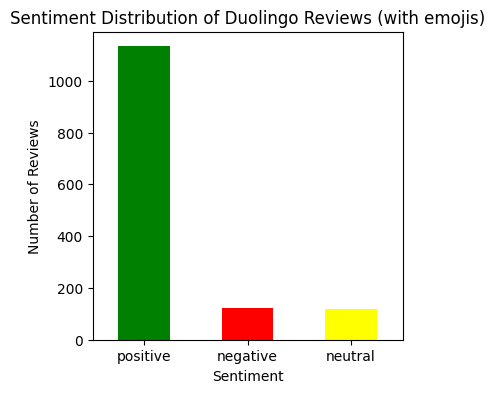

In [ ]:
#graphical representation
sentiment_counts = df['sentiment'].value_counts()
colors = {"negative": "red", "neutral": "yellow", "positive": "green"}

plt.figure(figsize=(4,4))
sentiment_counts.plot(kind='bar', color=[colors[s] for s in sentiment_counts.index])
plt.title("Sentiment Distribution of Duolingo Reviews (with emojis)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()